# introduction to Machine Learning - extra practice


This notebook is intended as an opportunity for people who took the course to come back to the visited topic some time after the course (eg, a month). 

Indeed, if we do not get to practice right away what we learn, it is often easy to forget about it. 

We hope that this notebook will help you solidify the knowledge gained during the course.

---


The PROBITsim is a simulated dataset from ([Goetghebeur et al. 2020](https://onlinelibrary.wiley.com/doi/10.1002/sim.8741)) inspired by the Promotion of Breastfeeding Intervention Trial (PROBIT) ([Kramer et al, 2001](https://pubmed.ncbi.nlm.nih.gov/11242425/)) in which mother-infant pairs across 31 Belarusian maternity hospitals were cluster randomized to receive either standard care or a breastfeeding encouragement intervention to investigate the effect of breastfeeding on a child’s later development.

The original data includes different exposure strategies, the infant’s weight at 3 months as the outcome of interest and several covariates.

Here, we propose to focus on how much weight the infant gained during the first 3 months of their life,
 as well as limit ourselves to mothers that were included in the intervention arm of the study (ie, they were offered the opportunity to consult some breastfeeding promotional material during their pregnancy).
 
 


---

In [354]:
df = pd.read_csv( "breastfeeding_data.csv" , index_col = 0 )
df.head()

consult breastfeed        location  age          educ smoke cesarean sex  \
id                                                                             
1.0      no         no   urban western   26  intermediate    no       no   F   
2.0      no         no  urban, eastern   26  intermediate   yes      yes   F   
3.0      no        yes  urban, eastern   21           low    no       no   F   
4.0      no         no   rural western   26          high   yes       no   M   
5.0      no         no   urban western   28  intermediate   yes      yes   F   

    allergy  wgt_gain_3  
id                       
1.0      no        2528  
2.0      no        2478  
3.0      no        3098  
4.0     yes        3095  
5.0      no        2406

In [363]:
df.shape

(8667, 10)

In [351]:
target = 'wgt_gain_3'
features = ['consult','breastfeed','location','age','educ','smoke','cesarean','sex','allergy']

The columns are:
 * consult : whether the mother consulted the breastfeeding promotional material
 * breastfeed : whether the mother started breastfeeding their infant (note: this feature just records that breastfeeding was starts; the actual duration of breastfeeding could range from 1 day to 3 month here)
 * location: mother location in the country
 * age: mother's age, in years
 * educ: mother's education level (low,intermediate,high)
 * smoke: whether the mother smoked during pregnancy
 * cesarean: whether the infant was born by cesarean
 * sex: infant sex
 * allergy: whether the mother suffers from allergies
 * wgt_gain_3: weight gain of the infant between birth and 3 months (this is the target variable)

## Instructions:



0. **preprocessing and setting up**: one-hot encode categorical variables, and set aside 50% of the data as test set.

1. **EDA:** perform an exploratory data analysis. 

        a. Look at some of the relationship between features, and between features and weight gain at 3 months
        b. Try to ascertain if the relationships are non-linear or linear and think on how this may impact which model you want to use.
 
2. **train a few models** to predict the weight gain at 3 months

        a. decide on the metric and hyper-parameter strategy you want to have
        b. decide on the models and hypr-parameters you want to test
        c. train, optimize, and compare the models
        
> **Warning**: this dataset is a bit bigger than the one we played with during the course. I advise you to test with only a few hyper-parameter combinations first to get a feel for how long the training will take.

3. **final model evaluation**: use the testing data to assess how well your model is performing.
        * check how good the predictions are. Are they equally good in most main categories of the data
        
4. try to **interpret** and understand your models results.

        * use the model coefficient of feature importance to understand how the feature influence the model's prediction. (if your chosen model does not have coefficients, you can use [permutation feature importance](https://scikit-learn.org/stable/modules/permutation_importance.html)).

> **note:** depending on your final model, the interpretation is not always straightforward. In the correction I try to demonstrate a bit some of the difficulties we can encounter.

---

We hope that this notebook will help you solidify the knowledge gained during the course. 

Whether it did or not, I would be very grateful if you could **let me know what you though about it by dropping me a small e-mail at wandrille.duchemin@unibas.ch** . 

Even if you did not finish it or just read through the correction : this is part of a little experiment about the long-term impact of our course and spaced practice and I am very curious about it.

# Proposed correction 

# preprocessing

one-hot encoding of categorical features and train/test split 

In [357]:
# one-hot encoding
df_encoded = pd.get_dummies( df , drop_first=True )

In [359]:
# separating X and y
Xall = df_encoded.drop(columns=[target])
yall = np.array( df_encoded[target] )


In [362]:
## train test split, keeping 50% of the data aside
from sklearn.model_selection import train_test_split

X , X_test , y , y_test =  train_test_split( Xall, yall ,   test_size=0.5)


In [180]:
X_test.to_csv("breastfeeding_test.csv")

In [181]:
df.shape

(8522, 10)

In [182]:
df.to_csv("breastfeeding_train.csv")

In [183]:
## one hot encoding
X = pd.get_dummies( df[features] , drop_first=True)
y = np.array( df[ target ] )

# EDA



In [364]:
## let's check if there are any NAs
df.isna().sum()

consult       0
breastfeed    0
location      0
age           0
educ          0
smoke         0
cesarean      0
sex           0
allergy       0
wgt_gain_3    0
dtype: int64

There are no missing values, that's one less issue we have to worry about.

<Axes: xlabel='wgt_gain_3', ylabel='Count'>

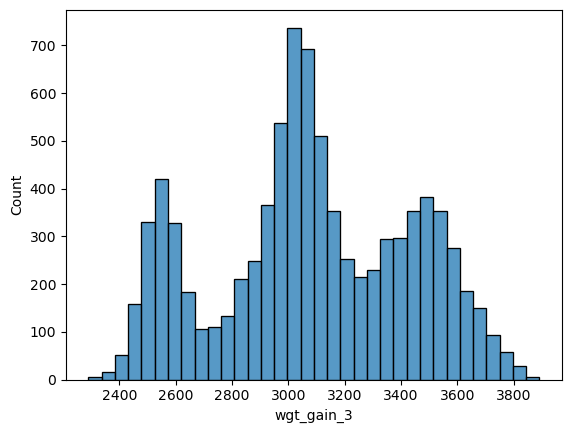

In [365]:
## looking  at the target alone

sns.histplot( df.wgt_gain_3 )

We can look at the general correlation between features and the weight at three months:

<Axes: xlabel='age', ylabel='wgt_gain_3'>

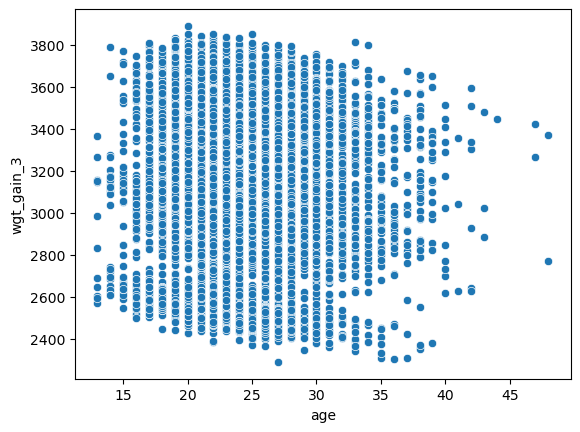

In [366]:
sns.scatterplot( df , x = 'age' , y = 'wgt_gain_3' )

As expected there is a relatively strong relationship between weight at birth and weight at 3 months.

from there we can try to color this color with a few categorical features :

<Axes: xlabel='age', ylabel='wgt_gain_3'>

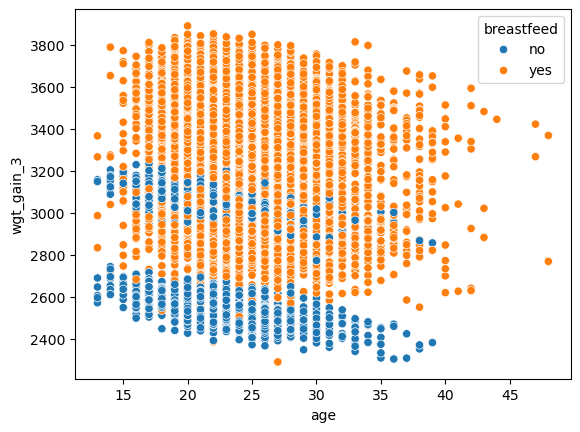

In [367]:
sns.scatterplot( df , x = 'age' , y = 'wgt_gain_3' , hue = 'breastfeed')

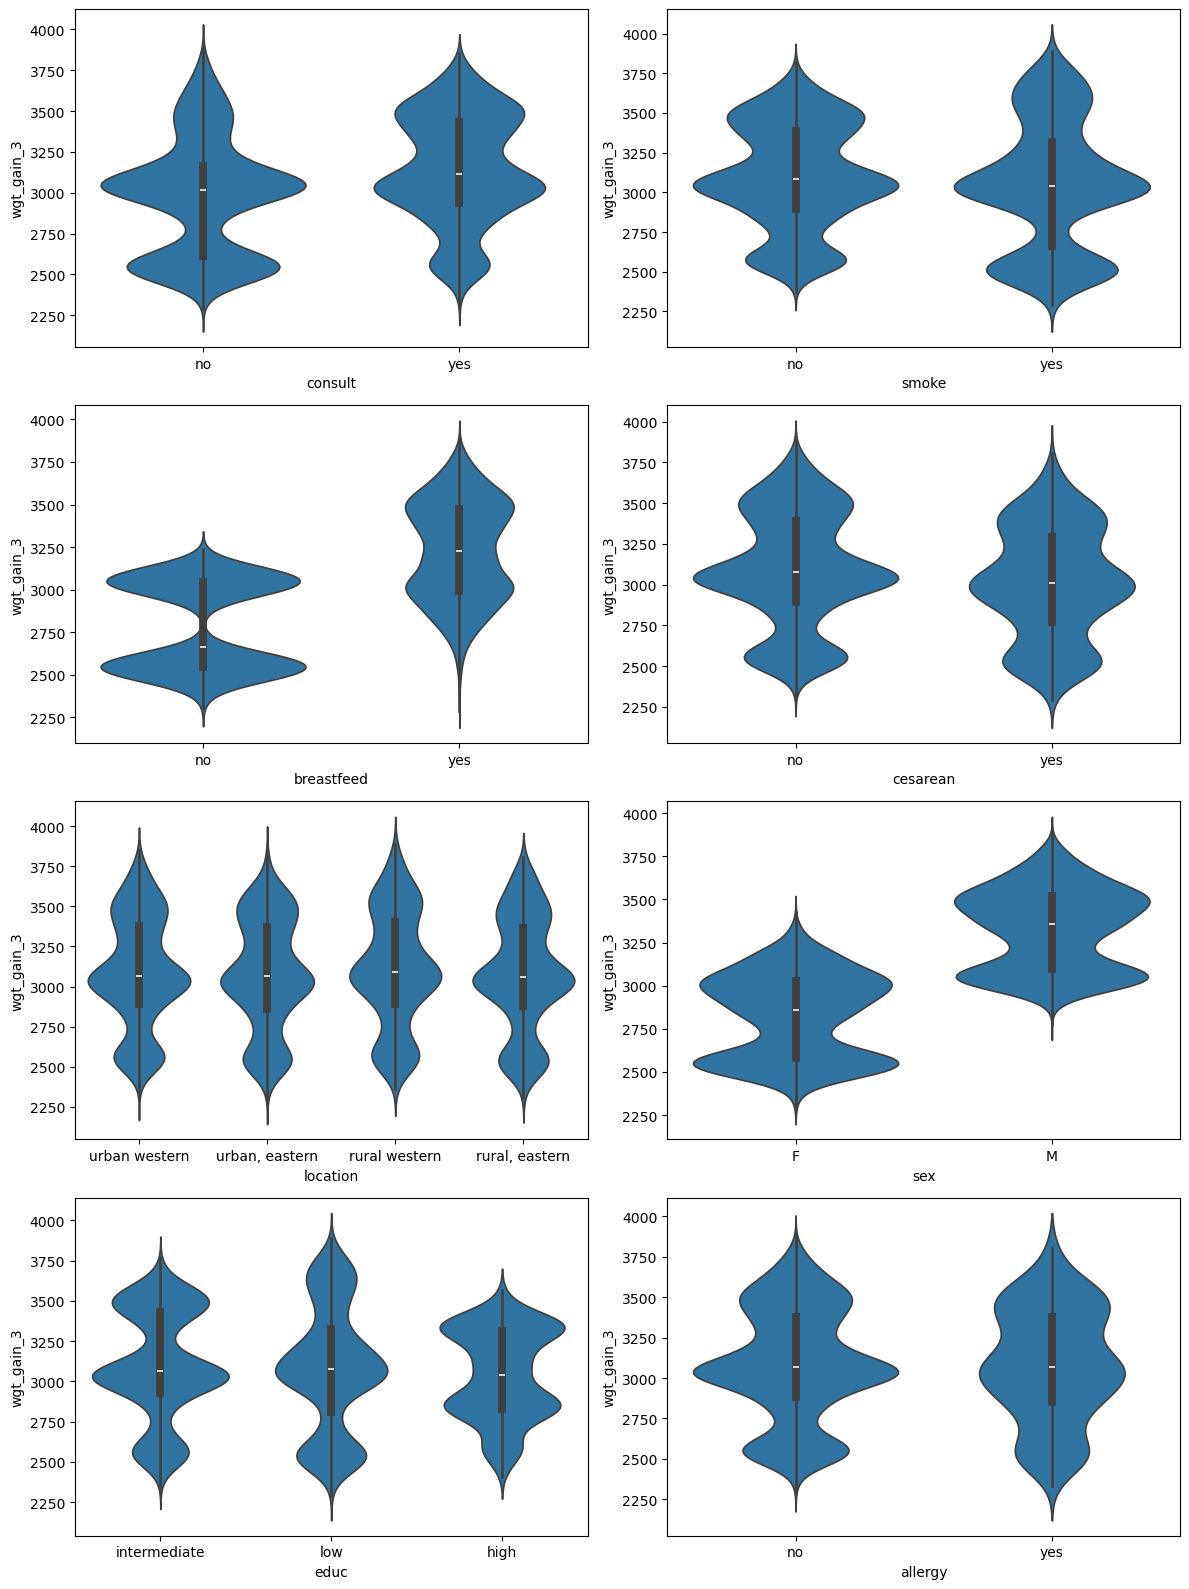

In [368]:
features_cat = ['consult','breastfeed','location','educ',
                'smoke','cesarean','sex','allergy']

fig,axes = plt.subplots( 4 , 2 , figsize = (12,16) )

for i,cat in enumerate(features_cat):
    
    ax = axes[ i%4,i//4 ]
    sns.violinplot( df , x = cat, y = 'wgt_gain_3' ,ax=ax )
fig.tight_layout()

That is some peculiar patterns, with some apparent sub-populations inside each group.

We can try to investigate some interactions:

<Axes: xlabel='breastfeed', ylabel='wgt_gain_3'>

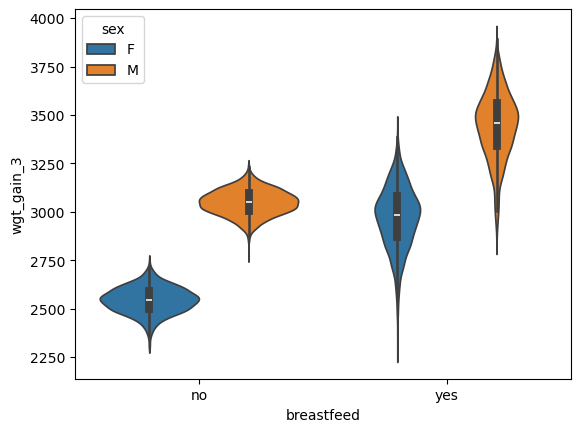

In [369]:
## breastfeed and baby's sex
sns.violinplot(df , 
               x = 'breastfeed', 
               y = 'wgt_gain_3' , 
               hue = 'sex' )

So stratifying by baby's sex and breastfeeding status seems to get us to more "homogeneous" subpopulations.

We can try with other features:

<Axes: xlabel='educ', ylabel='wgt_gain_3'>

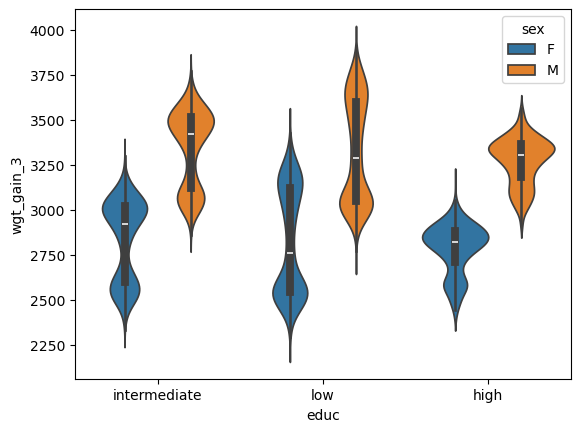

In [370]:
## education and sex
sns.violinplot(df , 
               x = 'educ', 
               y = 'wgt_gain_3' , 
               hue = 'sex' )

This gets better if again we add breastfeeding status:

<Axes: xlabel='educ', ylabel='wgt_gain_3'>

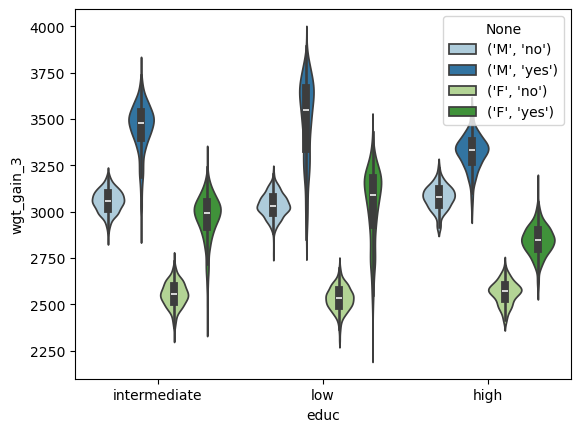

In [371]:
CAT = df[["sex", "breastfeed"]].apply(tuple, axis=1)
sns.violinplot(df , 
               x = 'educ', 
               y = 'wgt_gain_3' , 
               hue = CAT, 
               hue_order = [('M', 'no'),('M', 'yes'),('F', 'no'),('F', 'yes')] ,
               palette=sns.color_palette("Paired")[:4] )

Interestingly we see different patterns relating breastfeeding effect and education : the weight gains seems similar irrespective of education level when there is no breastfeeding, 
whereas it seems that breastfeeding is associated to lower gains when the educaiton is higher (this observation can be somewhat complemented by the fact that mother with a higher education level tend to have heavier children - you can look up the original data source to see that).

What about smoking status:

<Axes: xlabel='smoke', ylabel='wgt_gain_3'>

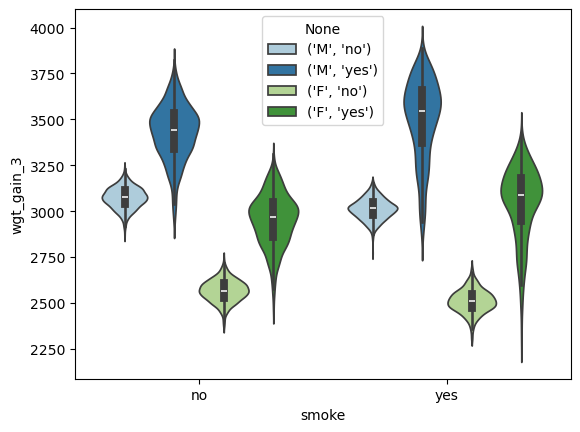

In [372]:
CAT = df[["sex", "breastfeed"]].apply(tuple, axis=1)
sns.violinplot(df , 
               x = 'smoke', 
               y = 'wgt_gain_3' , 
               hue = CAT, 
               hue_order = [('M', 'no'),('M', 'yes'),('F', 'no'),('F', 'yes')] ,
               palette=sns.color_palette("Paired")[:4] )

But we cold also explore the relationship between features.
For example, the sex of the baby and the mother smoking status don't seem associated:

In [373]:
from scipy import stats

res = stats.fisher_exact( pd.crosstab(df.smoke, df.sex) )
print(f"independence test between smoking status of the mother and baby's sex : pvalue = {res.pvalue:.2e} (Fisher exact test)")
t

independence test between smoking status of the mother and baby's sex : pvalue = 1.28e-01 (Fisher exact test)


breastfeed    no   yes
smoke                 
no          2210  3945
yes         1316  1051

But some are associated:

independence test between smoking status of the mother and mother's allergy : pvalue = 1.05e-72 (Fisher exact test)


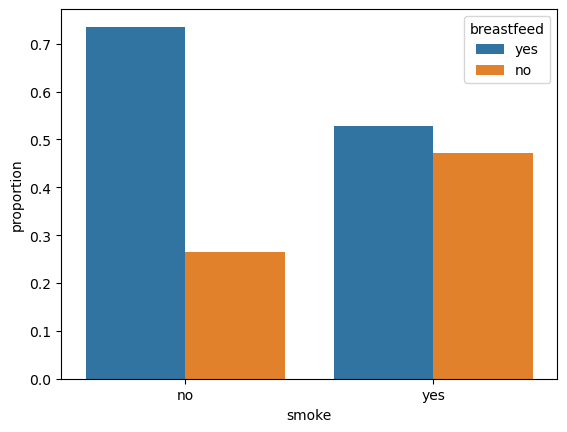

In [374]:
a = 'smoke'
b = 'breastfeed'

res = stats.fisher_exact(pd.crosstab(df[a], df[b]))
print(f"independence test between smoking status of the mother and mother's allergy : pvalue = {res.pvalue:.2e} (Fisher exact test)")

## looking at proportion in the different subgroups:
prop_df = df.groupby( a ,observed=True)[b].value_counts(normalize = True).reset_index()
ax = sns.barplot(x=a, y="proportion", hue = b, data=prop_df)

### PCA

we can also complete this EDA with a PCA to have a look at patterns of variability in the data:

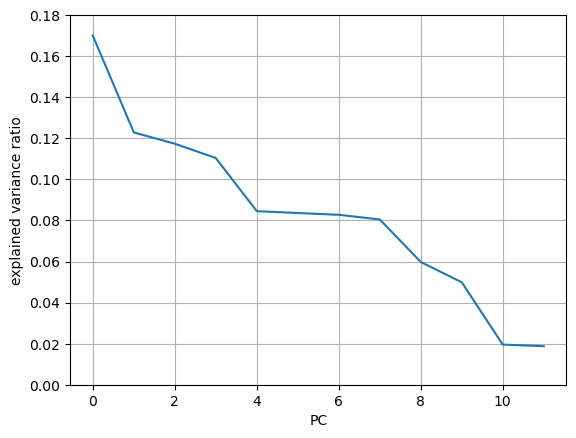

In [385]:
from sklearn.decomposition import PCA

Xs = StandardScaler().fit_transform( Xall )
pca = PCA()
Xpca = pca.fit_transform( Xs )


plt.plot( pca.explained_variance_ratio_ )
plt.ylim(0,0.18)
plt.xlabel("PC")
plt.ylabel("explained variance ratio")
plt.grid()

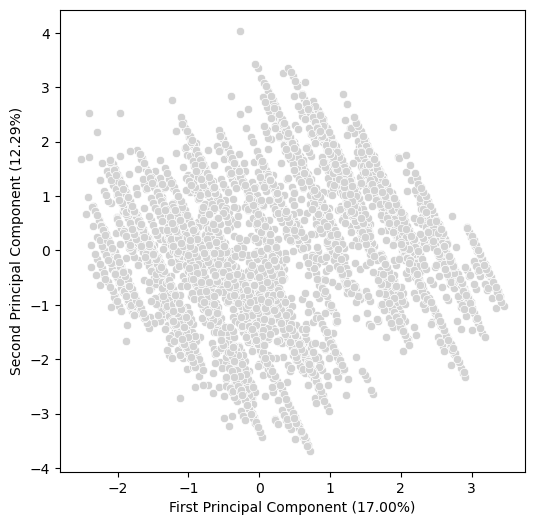

In [386]:
plt.figure(figsize=(6,6))
sns.scatterplot( x = Xpca[:,0], y=Xpca[:,1],color='lightgrey')
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.show()

In [387]:
import plotly.express as px

px.scatter_3d( x = Xpca[:,0],
               y = Xpca[:,1],
               z = Xpca[:,2] )

We see relatively clear clusters. We can look at the PC axes loadings to understand how some features drive these.

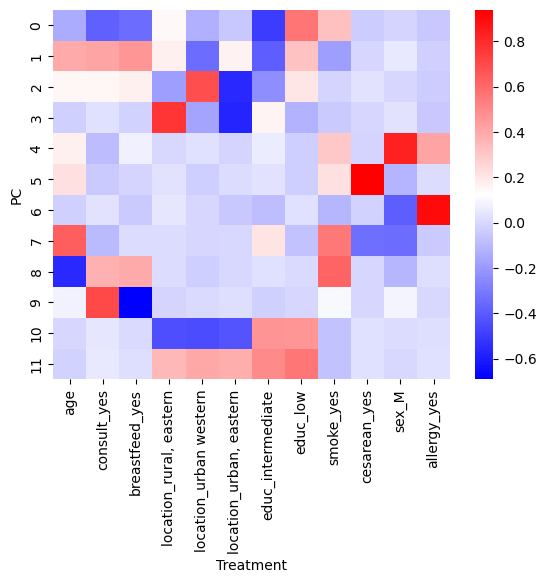

In [389]:
df_comp = pd.DataFrame(pca.components_,columns=Xall.columns)
sns.heatmap(df_comp,cmap='bwr')
plt.xlabel("Treatment")
plt.ylabel("PC")
plt.show()

Focusing on some of the first PCs:
 * PC0 : high contrasting between education levels
 * PC1 : relatively spread contributions - age, consultation and breastfeeding contribute positively - `educ_intermediate` is the maximum negative contributor
 * PC2 & PC3 : contrasting between locations
  
  
PC2 and PC3 (almost) linked to a single feature may points to a variability which is specific to these features.

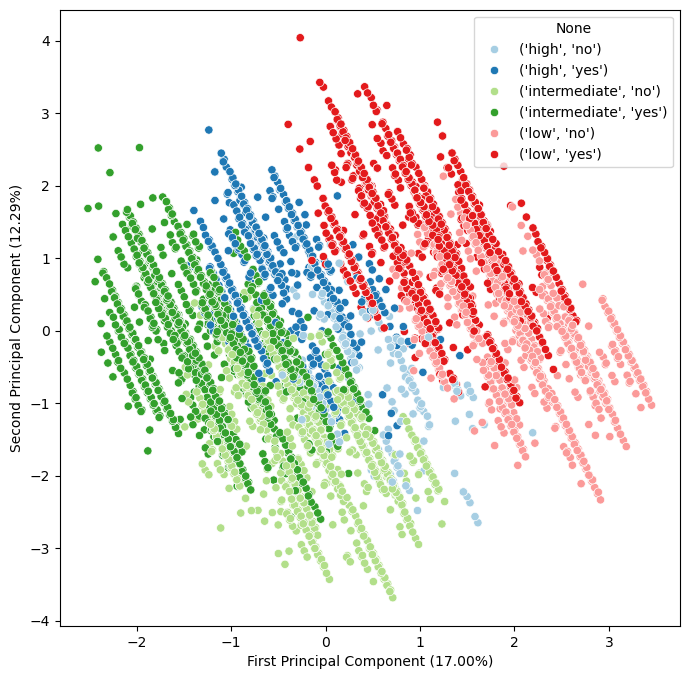

In [390]:
# We combine the 2 columns to later apply them as categories.
CAT = df[["educ", "breastfeed"]].apply(tuple, axis=1)

plt.figure(figsize=(8,8))
sns.scatterplot( x = Xpca[:,0], 
                 y = Xpca[:,1],
                 hue=CAT,
                 hue_order=sorted(CAT.unique()),         # Handle the order categories in legend.
                 palette=sns.color_palette("Paired")[:6] # Here the paired palette is great.
               )
plt.xlabel('First Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('Second Principal Component ({0:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.show()

In [391]:
CAT = df[["educ", "breastfeed"]].apply(tuple, axis=1)

px.scatter_3d( x = Xpca[:,0],
               y = Xpca[:,1],
               z = Xpca[:,2],
               color = CAT, symbol = df.location)

Indeed, as we suspected there are some clusters formed by location, education levels, and starting breastfeeding.

However these discontinuities, in particular in PC2 and PC3, are also linked to the fact that they are mostly linked to a single categorical variable.

Also, whether these clusters are linked to the weight at 3 months is something that remains to be seen. it sometimes happens that clusters we define during EDA can be added as an additional features in the modeling process.

Here, this would not be useful because these putative clusters correspond to the levels of a single feature which we already add to the models anyway.


# prediction of weight gain at 3 months


We will start with a simple penalized linear model :

In [392]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler



ppl_lin = Pipeline([ ( 'scale' , StandardScaler() ) ,
                 ( 'poly'  , PolynomialFeatures( include_bias = False ) ),
                 ( 'model' , SGDRegressor(penalty='elasticnet') ) 
               ]
              )


param_grid_lin = {
    'poly__degree' : [1, 2],
    'poly__interaction_only' : [True, False],
    'model__l1_ratio' : np.linspace(0,1,21),
    'model__alpha' : np.logspace(-3,3,41)
}
    

grid_lin = GridSearchCV( ppl_lin, 
                         param_grid_lin, 
                         cv = 3,
                         scoring='neg_mean_squared_error'
                       )
grid_lin.fit(X,y)

CPU times: user 23min 23s, sys: 16.4 s, total: 23min 40s
Wall time: 5min 55s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model',
                                        SGDRegressor(penalty='elasticnet'))]),
             param_grid={'model__alpha': array([1.00000000e-03, 1.41253754e-03, 1.99526231e-03, 2.81838293e-03,
       3.98107171e-03, 5.62341325e-03, 7.94328235e-03, 1.12201845e-02,
       1.58489319e-02, 2.23872114e-02,...
       1.58489319e+01, 2.23872114e+01, 3.16227766e+01, 4.46683592e+01,
       6.30957344e+01, 8.91250938e+01, 1.25892541e+02, 1.77827941e+02,
       2.51188643e+02, 3.54813389e+02, 5.01187234e+02, 7.07945784e+02,
       1.00000000e+03]),
                         'model__l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
                         'poly__degree': [1, 2],
                         'poly__interaction_only': [True, False]},
             scoring='neg_mean_squared_error')

In [393]:
best_score = grid_lin.best_score_
print(f'best cross-validated "negative mean squared error": {best_score}')
print(f"\tcorresponds to an average error of ~{(-best_score)**0.5:.0f} grams")

best cross-validated "negative mean squared error": -14126.466371517738
	corresponds to an average error of ~119 grams


In [394]:
print("Best parameters:")
for k,v in grid_lin.best_params_.items():
    print(f"{k:>30} : {v}")

Best parameters:
                  model__alpha : 1.0
               model__l1_ratio : 1.0
                  poly__degree : 2
        poly__interaction_only : True


Ok, so a model with interaction, and a full l1 penalty (so we can expect not all interaction terms have been kept).

---

We will contrast this with a random forest to see if we get anything better from something non-linear

In [395]:
X.shape

(4333, 12)

In [396]:
%%time
from sklearn.ensemble import RandomForestRegressor


param_grid_rf = {
    'max_depth' : [ 5, 10, 15, 20 ],
    'min_samples_leaf' : [5,10,20,50],
    'max_features' : [0.5,0.75,1.0], # how many randomly features per tree
}
    

grid_rf = GridSearchCV( RandomForestRegressor( n_estimators= 1000 ), 
                         param_grid_rf, 
                         cv = 3,
                         scoring='neg_mean_squared_error'
                       )
grid_rf.fit(X,y)

CPU times: user 4min 18s, sys: 627 ms, total: 4min 19s
Wall time: 4min 19s


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=1000),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.5, 0.75, 1.0],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='neg_mean_squared_error')

In [397]:
best_score = grid_rf.best_score_
print(f'best cross-validated "negative mean squared error": {best_score}')
print(f"\tcorresponds to an average error of ~{(-best_score)**0.5:.0f} grams")

best cross-validated "negative mean squared error": -14709.690550303761
	corresponds to an average error of ~121 grams


In [398]:
print("Best parameters:")
for k,v in grid_rf.best_params_.items():
    print(f"{k:>30} : {v}")

Best parameters:
                     max_depth : 10
                  max_features : 0.5
              min_samples_leaf : 10


So the random forest has a slighly lower performance than the linear regression here.

---

Here, because we have many samples, a simple KNN may also work well

In [399]:
%%time
from sklearn.neighbors import KNeighborsRegressor

ppl_knn = Pipeline([ ( 'scale' , StandardScaler() ) ,
                 ( 'model' , KNeighborsRegressor() ) 
               ]
              )


param_grid_knn = {
    'model__n_neighbors' : np.arange(5,150,5),
    'model__weights' :['uniform','distance']
}
    

grid_knn = GridSearchCV( ppl_knn, 
                         param_grid_knn, 
                         cv = 3,
                         scoring='neg_mean_squared_error'
                       )
grid_knn.fit(X,y)

CPU times: user 14.9 s, sys: 3.97 ms, total: 14.9 s
Wall time: 14.9 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145]),
                         'model__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [400]:
best_score = grid_knn.best_score_
print(f'best cross-validated "negative mean squared error": {best_score}')
print(f"\tcorresponds to an average error of ~{(-best_score)**0.5:.0f} grams")

best cross-validated "negative mean squared error": -21120.964988603362
	corresponds to an average error of ~145 grams


In [401]:
print("Best parameters:")
for k,v in grid_knn.best_params_.items():
    print(f"{k:>30} : {v}")

Best parameters:
            model__n_neighbors : 5
                model__weights : uniform


The kNN model is not bad, but it is doing worse than our best linear regression (whose prediction are on average ~26gr closer to the ground truth duringthe cross-validation).

# model evaluation

We have our final model, let's load the test data and see how we are doing.

In [402]:
best_model = grid_lin.best_estimator_
best_model

Pipeline(steps=[('scale', StandardScaler()),
                ('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('model',
                 SGDRegressor(alpha=np.float64(1.0), l1_ratio=np.float64(1.0),
                              penalty='elasticnet'))])

Let's predict the train and the test data, so we can eventually compare the two

In [417]:
y_pred=best_model.predict(X)
y_pred_test=best_model.predict(X_test)

print(f"mean absolute error train: {np.abs(y_pred - y).mean():.1f}gr")
print(f"mean absolute error test : {np.abs(y_pred_test - y_test).mean():.1f}gr")
 

mean absolute error train: 80.4gr
mean absolute error test : 83.4gr


OK, that's not so bad!

Text(0, 0.5, 'truth')

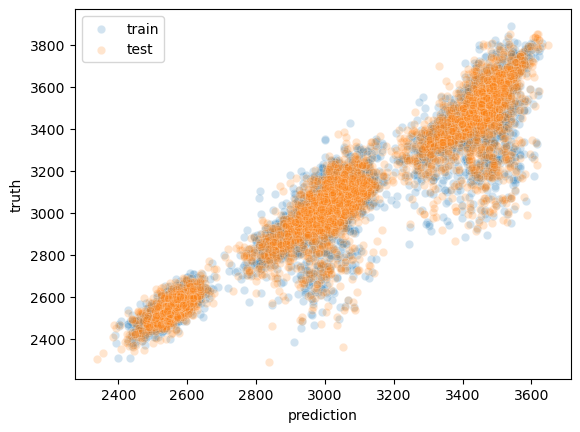

In [419]:
## plotting truth and predictions:
sns.scatterplot(x=y_pred,y=y , alpha = 0.2, label='train')
sns.scatterplot(x=y_pred_test,y=y_test, alpha = 0.2, label='test')
plt.xlabel("prediction")
plt.ylabel("truth")

we can observe that :
 * train and test data seem to have similar error error patterns
 * there are subgroups whose predictions are more accurate than others (with a tendency toward overestimation)
 
Let's investigate this second point further

<Axes: ylabel='Count'>

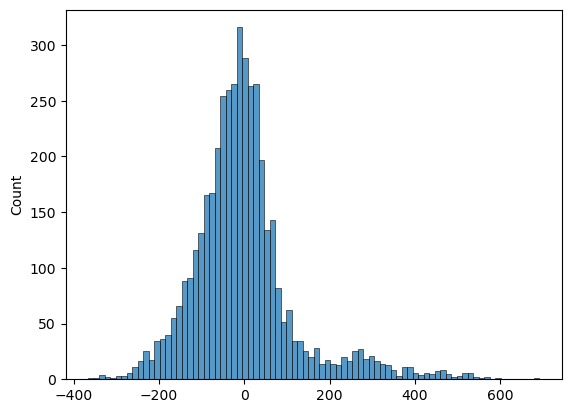

In [420]:
#model error:
pred_error = y_pred_test - y_test
sns.histplot(pred_error)

We confirm here that we have some points for which we tend to over-estimate the weights gains by about 200gr. or so.

Text(0, 0.5, 'prediction error')

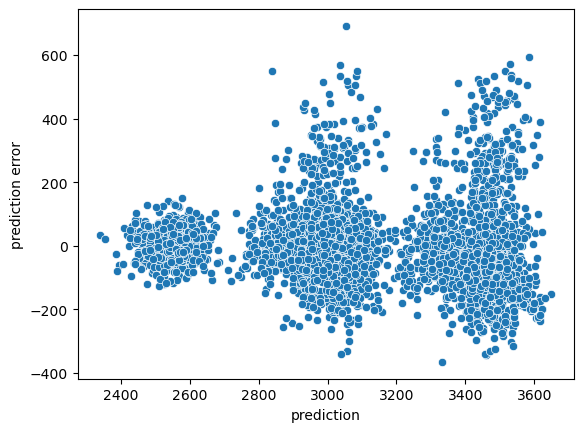

In [422]:
sns.scatterplot(x=y_pred_test,y=pred_error)
plt.xlabel("prediction")
plt.ylabel("prediction error")

So it seems we do not have the same predicition accuracy all throughout our prediction space.
This is a case of heteroskedasticity.

From the standpoint of statistics that is a problem and we could, for example, not use a gaussian approximation to derive 95% confidence intervals for the parameters. We would also not be able to use a Likelihood Ratio Test to do model selection.

From the standpoint of Machine Learning though, we do not care that much: or process is purely performance oriented  here so the only thing we care about is the cross-validated (ie, generalizable) mean squared error which we optimized. 

In some case though, you may want to nuance this judgment, limit the set of models you explore (limiting your self to only models with good statistical properties for exaple), or adapt the metric you are optimizing to reflect the goal of your inquiry.

---
Let's investigate how we do in different subgroups:

Text(0, 0.5, 'model error')

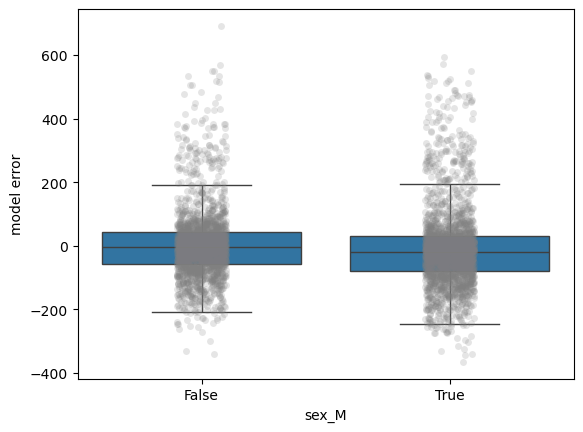

In [423]:
sns.boxplot(x=X_test.sex_M,y=pred_error, fliersize=0)
sns.stripplot(x=X_test.sex_M,y=pred_error, color = 'grey', alpha = 0.2)
plt.ylabel("model error")

Text(0, 0.5, 'model error')

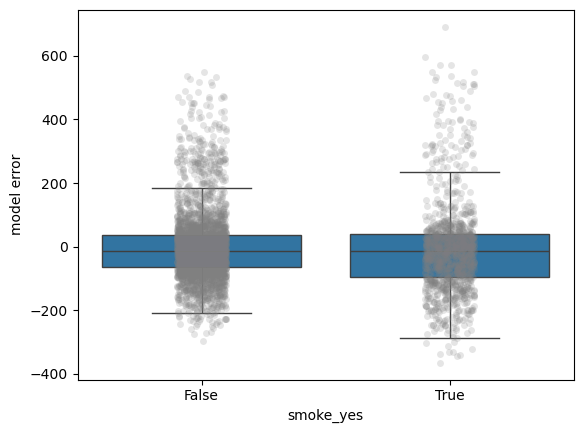

In [424]:
sns.boxplot(x=X_test.smoke_yes,y=pred_error, fliersize=0)
sns.stripplot(x=X_test.smoke_yes,y=pred_error, color = 'grey', alpha = 0.2)
plt.ylabel("model error")

The error seems similar for the baby's sex, and perhaps slighly different with respect to smoking status

In [431]:
test_educ

educ
id                   
12543.0  intermediate
13725.0           low
504.0    intermediate
16034.0  intermediate
3486.0   intermediate
...               ...
7067.0   intermediate
5858.0           high
13462.0           low
5560.0            low
14638.0  intermediate

[4334 rows x 1 columns]

Text(0, 0.5, 'model error')

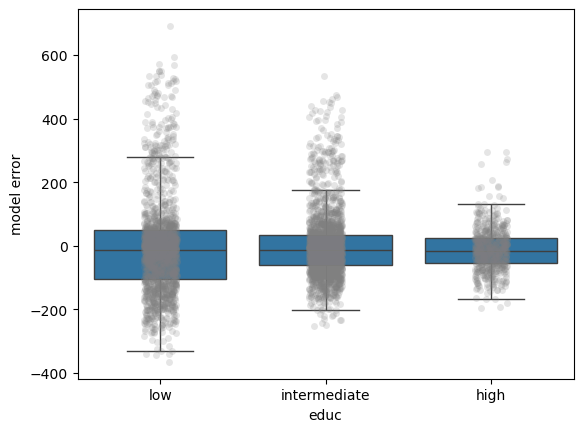

In [433]:
## reverse one-hot encoding for nicer plot
test_educ = pd.from_dummies( X_test[["educ_low","educ_intermediate"]] , default_category='high', sep= '_').educ

sns.boxplot(x=test_educ,y=pred_error, fliersize=0, order=['low','intermediate','high'])
sns.stripplot(x=test_educ,y=pred_error, color = 'grey', alpha = 0.2)
plt.ylabel("model error")

We seem to have more error for mothers with a low education than a high education

Text(0, 0.5, 'model error')

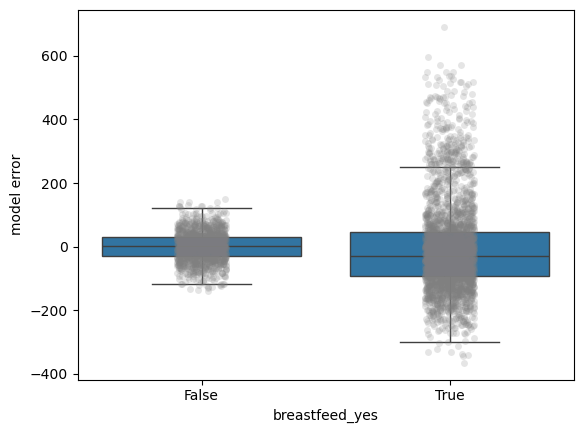

In [434]:
sns.boxplot(x=X_test.breastfeed_yes,y=pred_error, fliersize=0)
sns.stripplot(x=X_test.breastfeed_yes,y=pred_error, color = 'grey', alpha = 0.2)
plt.ylabel("model error")

Text(0, 0.5, 'model error')

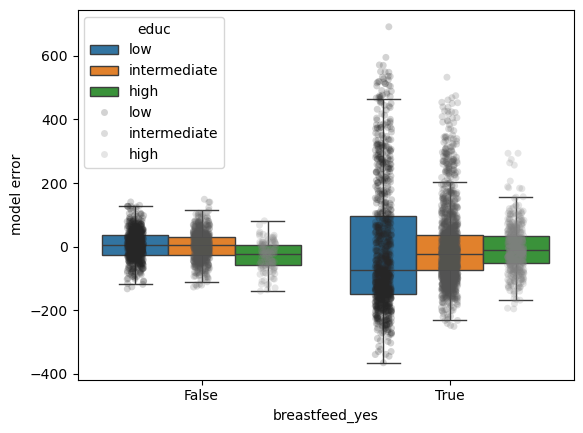

In [435]:
## these effect seem to compound:
sns.boxplot(x=X_test.breastfeed_yes,y=pred_error, hue = test_educ, fliersize=0)
sns.stripplot(x=X_test.breastfeed_yes,y=pred_error, hue = test_educ, palette='dark:grey', alpha = 0.2, dodge=True)
plt.ylabel("model error")

Similarly, we seem to have a lot more error among mothers who started breastfeeding. This may be because there is an heterogeneity in breastfeeding duration (which could be for just a few days, up to the full 3 months)

---

In any case, it helps us understand a bit better the structure and quality of our models predictions.

One thing of note is that these difference in quality prediction may reflect a problem in our model OR it is also possible that there is a inherently higher variation of weight gains in some subgroups.

> **note:** This goes beyond some of what we hae seen during the course, but I hope this helps you realise the sort of questions we can (and should) ask about our models predictions.


# model interpretation

As the best model so-far is a linear regression, we can understand the model relatively easily thanks to the coefficients.

However understanding the precise role of each feature in the model's prediction will require a bit more work, because because the model includes some interaction terms, and because of the normalization.

In [436]:
poly = best_model['poly']
LR = best_model['model']

def pow2name(power, fnames = X.columns ):
    ""
    n = []
    for i,j in enumerate(power):
        if j>0:
            n.append( fnames[i] )
            if j > 1:
                n[-1] += '^'+str(j) 
    return "_*_".join(n)
    
sorted_list=sorted( zip( map( pow2name , poly.powers_) , LR.coef_ ) ,
                   key= lambda x : x[1],
                   reverse=True)
print('model importances')
for f,w in sorted_list:
    if w != 0: ## let's not print the coefficient with no weight
        print(f"{f:>50}\t{w:.2f}")

model importances
                                             sex_M	237.67
                                    breastfeed_yes	197.17
                         breastfeed_yes_*_educ_low	32.57
                breastfeed_yes_*_educ_intermediate	24.79
                        breastfeed_yes_*_smoke_yes	20.97
                                       consult_yes	19.43
                      consult_yes_*_breastfeed_yes	12.23
                                         smoke_yes	10.01
                            consult_yes_*_educ_low	7.92
                              age_*_breastfeed_yes	6.16
                                    age_*_educ_low	5.81
                     age_*_location_urban, eastern	4.04
                        consult_yes_*_cesarean_yes	3.80
                               consult_yes_*_sex_M	3.20
                  educ_intermediate_*_cesarean_yes	2.76
                      age_*_location_urban western	2.61
                      breastfeed_yes_*_allergy_yes	2.16
                    

This list is useful to help us understand the most important feature, or feature combinations.

However, if we wanted to compute how much setting breastfeeding to `True` would affect the results, it wouldn't be as simple as just looking up the `breastfeed_yes` coefficient and say that this is by how much the prediction would increase.

> **Warning:** what follows is a somewhat complex dissection of the model.

### issue 1 : scaling

in our case the coefficient `breastfeed_yes` is `197.17`.

So naively we could presume that switching `breastfeed_yes` from 0 to 1 would increase the output by `197.17`.

However, remember that our data is scaled:

In [440]:
## first 5 test rows
X_test.head()

age  consult_yes  breastfeed_yes  location_rural, eastern  \
id                                                                   
12543.0   26         True            True                    False   
13725.0   25        False           False                     True   
504.0     24         True           False                     True   
16034.0   22         True            True                    False   
3486.0    22         True            True                    False   

         location_urban western  location_urban, eastern  educ_intermediate  \
id                                                                            
12543.0                    True                    False               True   
13725.0                   False                    False              False   
504.0                     False                    False               True   
16034.0                   False                     True               True   
3486.0                    False                    False               True   

         educ_low  smoke_yes  cesarean_yes  sex_M  allergy_yes  
id                                                              
12543.0     False       True         False  False        False  
13725.0      True      False         False   True        False  
504.0       False       True         False   True        False  
16034.0     False      False         False  False        False  
3486.0      False      False         False   True        False

In [444]:
## apply scaling first 5 test rows
pd.DataFrame( best_model['scale'].transform(X_test.head()) , columns=X_test.columns)

age  consult_yes  breastfeed_yes  location_rural, eastern  \
0  0.382913     0.744420        0.689431                -0.561269   
1  0.165432    -1.343328       -1.450472                 1.781677   
2 -0.052049     0.744420       -1.450472                 1.781677   
3 -0.487010     0.744420        0.689431                -0.561269   
4 -0.487010     0.744420        0.689431                -0.561269   

   location_urban western  location_urban, eastern  educ_intermediate  \
0                1.434527                -0.597876           0.998847   
1               -0.697094                -0.597876          -1.001155   
2               -0.697094                -0.597876           0.998847   
3               -0.697094                 1.672587           0.998847   
4               -0.697094                -0.597876           0.998847   

   educ_low  smoke_yes  cesarean_yes     sex_M  allergy_yes  
0 -0.749294   1.627055      -0.36565 -1.037394    -0.216498  
1  1.334590  -0.614608      -0.36565  0.963954    -0.216498  
2 -0.749294   1.627055      -0.36565  0.963954    -0.216498  
3 -0.749294  -0.614608      -0.36565 -1.037394    -0.216498  
4 -0.749294  -0.614608      -0.36565  0.963954    -0.216498

You can see that `breastfeed_yes` = 1 corresponds to 0.689431 and `breastfeed_yes` = 0 corresponds to `-1.450472` in the scaled data (because the column is rescaled to a variance of 1.0).


So switching breastfeeding from 0 to 1 would mean an increase of `( 0.689431 - (-1.450472) ) = 2.139903`

This is to this number that we would apply the model's coefficient of `197.17`.

So the increase would be approximately `2.14 * 197.17 = 422`.


These scaling factor can be recovered from the scaler directly:

In [449]:
## looking at the model scaler
sc = best_model['scale']
sc.scale_

array([4.59810663, 0.47898503, 0.46731099, 0.42681306, 0.46912653,
       0.4404388 , 0.49999967, 0.47987324, 0.44609757, 0.32252776,
       0.49966325, 0.20680445])

These numbers corresponds to the scales of each columns in order (ie, by how much the values are divided when scaling orccurs). 

`breastfeed_yes` is the third column, so we get the difference between 0 and 1 with:

In [454]:
1/sc.scale_[2] # <- remember that python indexes start at 0

np.float64(2.1399026010703075)

### issue 2 : interaction

because our model includes interaction terms, the change induced by a feature value does not depend only on itself, but also on the other values:

In [458]:
coef_df = pd.DataFrame( sorted_list , columns=['name','coef'])
coef_df

name        coef
0                                sex_M  237.672788
1                       breastfeed_yes  197.168406
2            breastfeed_yes_*_educ_low   32.574029
3   breastfeed_yes_*_educ_intermediate   24.793937
4           breastfeed_yes_*_smoke_yes   20.967684
..                                 ...         ...
73             location_urban, eastern -347.819999
74              location_urban western -350.911928
75                   educ_intermediate -418.361619
76                            educ_low -561.960828
77        educ_intermediate_*_educ_low -620.777613

[78 rows x 2 columns]

let's focus again on breastfeeding:

In [462]:
coef_df.loc[ coef_df.name.str.contains("breastfeed", regex=False) , :]

name        coef
1                             breastfeed_yes  197.168406
2                  breastfeed_yes_*_educ_low   32.574029
3         breastfeed_yes_*_educ_intermediate   24.793937
4                 breastfeed_yes_*_smoke_yes   20.967684
6               consult_yes_*_breastfeed_yes   12.230002
9                       age_*_breastfeed_yes    6.163953
16              breastfeed_yes_*_allergy_yes    2.164808
31  breastfeed_yes_*_location_rural, eastern    0.000000
32   breastfeed_yes_*_location_urban western    0.000000
60  breastfeed_yes_*_location_urban, eastern   -3.052677
65                    breastfeed_yes_*_sex_M   -7.739184
66             breastfeed_yes_*_cesarean_yes  -11.518323

We see that there are many interaction, each of them affected by the scaling, which makes the task a bit daunting.

Let's restrain ourselve on the interaction of smoking and breastfeeding.

The associated coefficient is `20.967684`

In [470]:
X_test_scaled = pd.DataFrame( best_model['scale'].transform(X_test.head()) , columns=X_test.columns)


## scaled smoking values
smoke_vals = X_test_scaled.smoke_yes.unique()
smoke_vals.sort()
print("scaled smoking values:  [0,1] ->",smoke_vals)

## scaled breastfeeding values
bf_vals = X_test_scaled.breastfeed_yes.unique()
bf_vals.sort()
print("scaled breastfeeding values:  [0,1] ->",bf_vals)

scaled smoking values:  [0,1] -> [-0.61460756  1.62705452]
scaled breastfeeding values:  [0,1] -> [-1.45047171  0.68943089]


Now, the interaction is computed as the multiplication of both values:

In [471]:
for smoke in [0,1]:
    for bf in [0,1]:
        
        print(f"smoking: {smoke} ; breastfeeding: {bf} ; multiplicative term: { smoke_vals[smoke]*bf_vals[bf] }")

smoking: 0 ; breastfeeding: 0 ; multiplicative term: 0.8914708760721386
smoking: 0 ; breastfeeding: 1 ; multiplicative term: -0.4237294324129063
smoking: 1 ; breastfeeding: 0 ; multiplicative term: -2.359996553238111
smoking: 1 ; breastfeeding: 1 ; multiplicative term: 1.1217416371536955


These are the values that should be multiplied by the `breastfeed_yes_*_smoke_yes` coefficient value of `20.967684`

In [472]:
for smoke in [0,1]:
    for bf in [0,1]:
        
        print(f"smoking: {smoke} ; breastfeeding: {bf} ; interaction term:: { 20.967684*smoke_vals[smoke]*bf_vals[bf] }")

smoking: 0 ; breastfeeding: 0 ; interaction term:: 18.692079624683764
smoking: 0 ; breastfeeding: 1 ; interaction term:: -8.884624840333176
smoking: 1 ; breastfeeding: 0 ; interaction term:: -49.483661969385885
smoking: 1 ; breastfeeding: 1 ; interaction term:: 23.520324177481346


These can be seen as modulators to the `breastfeed_yes` coefficient depending on the smoking status.



In [473]:
## we computed before the coefficient of breastfeeding alone
bf_alone = 2.1399026010703075*197.17
for smoke in [0,1]:
    for bf in [0,1]:
        interaction = 20.967684*smoke_vals[smoke]*bf_vals[bf]
        print(f"smoking: {smoke} ; breastfeeding: {bf} ; base + interaction term: { bf_alone*bf + interaction }")


smoking: 0 ; breastfeeding: 0 ; base + interaction term: 18.692079624683764
smoking: 0 ; breastfeeding: 1 ; base + interaction term: 413.0399710126993
smoking: 1 ; breastfeeding: 0 ; base + interaction term: -49.483661969385885
smoking: 1 ; breastfeeding: 1 ; base + interaction term: 445.44492003051386


Of course, there would also be interplay with the `smoke_yes` coefficient, as well as all other interaction terms.


This makes this analysis quickly tedious. 

In practise, we would often rely on interpretation tools such as [shapley values](https://shap.readthedocs.io/en/latest/).

We can also use a synthetic data approach. The idea is to:
 * copy your data
 * fix a feature of interest to a given value (eg. breastfeed = 0) and predict the weight on this data
 * fix the feature to another given value (eg. breastfeed = 1) and predict again the weight on this new data
 * compute the difference between the two prediction sets


If we focus on breastfeeding again, this looks like:

In [475]:
## version of the data where breastfeeding_yes has been set to 0
Xt0 = X_test.copy()
Xt0.breastfeed_yes = False

## version of the data where breastfeeding_yes has been set to 1
Xt1 = X_test.copy()
Xt1.breastfeed_yes = True

Text(0.5, 0, 'predicted weight difference when breastfeeding is set to 1')

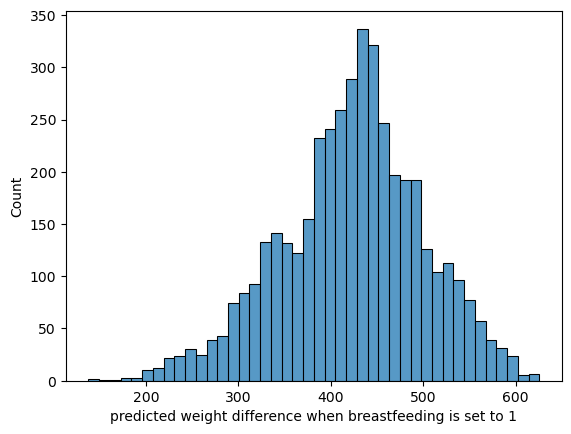

In [478]:
y0_pred = best_model.predict(Xt0) ## predictions where breastfeed is 0
y1_pred = best_model.predict(Xt1) ## predictions where breastfeed is 1

ydiff_pred = y1_pred - y0_pred ## difference between predictions

sns.histplot(ydiff_pred)
plt.xlabel("predicted weight difference when breastfeeding is set to 1")

We can contrast different subgroups:

Text(0, 0.5, 'predicted weight difference when breastfeeding is set to 1')

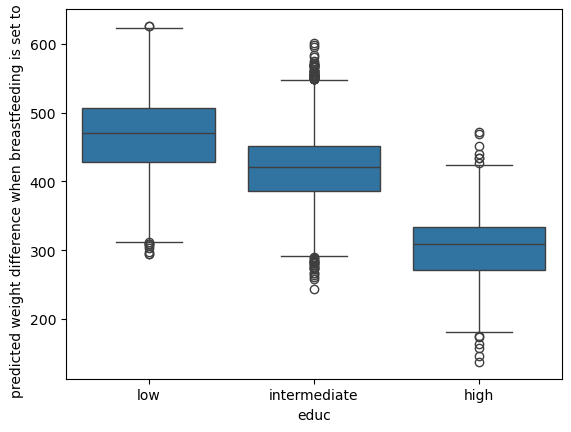

In [482]:
sns.boxplot( x = test_educ , y = ydiff_pred , order = ['low','intermediate','high'])
plt.ylabel("predicted weight difference when breastfeeding is set to 1")

We can see that our model tends to predict higher weight increase associated to breastfeeding for lower education levels.

--- 

Now, a few IMPORTANT words of warning:
 * the **distribution of weight gain here is also dependent on the distribution and correlation of other features**. For example, there is a correlation between smoking and lower education which somewhat confounds the values we see here.
 * everything we see here **must not be interpreted causaly**, but rather only as how our model works. Causal interpretation would require additionnal check for some statistical properties and appropriate model design.
    
 
